<a href="https://colab.research.google.com/github/KagontleBooysen/alu-machine_learning/blob/master/Copy_of_Summative_Assignment_(Kagontle_Booysen).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Using Gradient Descent: Linear Regression

In this assignment, you will build a simple linear regression model to predict sales based on TV marketing expenses. You will investigate three different approaches to this problem. You will use `NumPy` and `Scikit-Learn` linear regression models, as well as construct and optimize the sum of squares cost function with gradient descent from scratch.

Further you will add additional cells to compare Linear regression and atleast 1 other algorithm

# Table of Contents

- [ 1 - Open the Dataset and State the Problem]
  - [ Exercise 1]
- [ 2 - Linear Regression in Python with `NumPy` and `Scikit-Learn`]
  - [ 2.1 - Linear Regression with `NumPy`]
    - [ Exercise 2]
  - [ 2.2 - Linear Regression with `Scikit-Learn`]
    - [ Exercise 3]
    - [ Exercise 4]
- [ 3 - Linear Regression using Gradient Descent]
  - [ Exercise 5]
  - [ Exercise 6]

## Packages

Load the required packages:

In [1]:

# A library for programmatic plot generation.

# A library for data manipulation and analysis.

# LinearRegression from sklearn.


Import the unit tests defined for this notebook.

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

<a name='1'></a>

> Indented block

> Indented block




## 1 - Open the Dataset and State the Problem

In this lab, you will build a linear regression model for a simple Kaggle dataset, saved in a file `data/tvmarketing.csv`. The dataset has only two fields: TV marketing expenses (`TV`) and sales amount (`Sales`).

<a name='ex01'></a>
### Exercise 1

Use `pandas` function `pd.read_csv` to open the .csv file the from the `path`.

In [3]:
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = "/content/drive/MyDrive/tvmarketing.csv"


In [6]:
import pandas as pd
path = "/content/drive/MyDrive/data/tvmarketing.csv"

# Load the CSV data into a DataFrame
adv = pd.read_csv(path)

In [7]:
adv.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
adv = pd.read_csv(path)

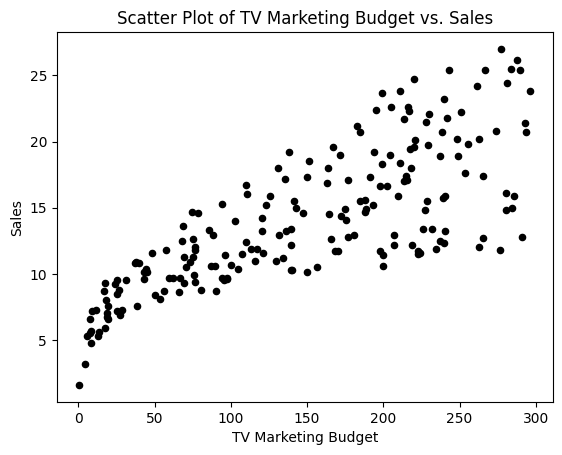

In [10]:
adv.plot(x='TV', y='Sales', kind='scatter', c='black')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Marketing Budget vs. Sales')
plt.show()


In [11]:
X = adv['TV']
Y = adv['Sales']

<a name='2.1'></a>
### 2.1 - Linear Regression with `NumPy`

In [12]:
m_numpy, b_numpy = np.polyfit(X, Y, 1)

print(f"Linear regression with NumPy. Slope: {m_numpy}. Intercept: {b_numpy}")

Linear regression with NumPy. Slope: 0.04753664043301975. Intercept: 7.0325935491276965


**Exercise 2**


In [13]:
# This is organised as a function only for grading purposes.
def pred_numpy(m, b, X):
    Y = m*X + b

    return Y

In [14]:
X_pred = np.array([50, 120, 280])
Y_pred_numpy = pred_numpy(m_numpy, b_numpy, X_pred)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using NumPy linear regression:\n{Y_pred_numpy}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using NumPy linear regression:
[ 9.40942557 12.7369904  20.34285287]


In [15]:
def test_pred_numpy(target_pred_numpy):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "m": 0.04753664043301975,
                "b": 7.0325935491276965,
                "X": np.array([50, 120, 280]),
            },
            "expected": {
                "Y": np.array([9.40942557, 12.7369904, 20.34285287]),
            }
        },
        {
            "name": "extra_check",
            "input": {
                "m": 2,
                "b": 10,
                "X": np.array([-5, 0, 1, 5])
            },
            "expected": {
                "Y": np.array([0, 10, 12, 20]),
            }
        },
    ]

**2.2 - Linear Regression with Scikit-Learn**

In [16]:
lr_sklearn = LinearRegression()

In [17]:
print(f"Shape of X array: {X.shape}")
print(f"Shape of Y array: {Y.shape}")

try:
    lr_sklearn.fit(X, Y)
except ValueError as err:
    print(err)

Shape of X array: (200,)
Shape of Y array: (200,)
Expected 2D array, got 1D array instead:
array=[230.1  44.5  17.2 151.5 180.8   8.7  57.5 120.2   8.6 199.8  66.1 214.7
  23.8  97.5 204.1 195.4  67.8 281.4  69.2 147.3 218.4 237.4  13.2 228.3
  62.3 262.9 142.9 240.1 248.8  70.6 292.9 112.9  97.2 265.6  95.7 290.7
 266.9  74.7  43.1 228.  202.5 177.  293.6 206.9  25.1 175.1  89.7 239.9
 227.2  66.9 199.8 100.4 216.4 182.6 262.7 198.9   7.3 136.2 210.8 210.7
  53.5 261.3 239.3 102.7 131.1  69.   31.5 139.3 237.4 216.8 199.1 109.8
  26.8 129.4 213.4  16.9  27.5 120.5   5.4 116.   76.4 239.8  75.3  68.4
 213.5 193.2  76.3 110.7  88.3 109.8 134.3  28.6 217.7 250.9 107.4 163.3
 197.6 184.9 289.7 135.2 222.4 296.4 280.2 187.9 238.2 137.9  25.   90.4
  13.1 255.4 225.8 241.7 175.7 209.6  78.2  75.1 139.2  76.4 125.7  19.4
 141.3  18.8 224.  123.1 229.5  87.2   7.8  80.2 220.3  59.6   0.7 265.2
   8.4 219.8  36.9  48.3  25.6 273.7  43.  184.9  73.4 193.7 220.5 104.6
  96.2 140.3 240.1 243.2  3

In [28]:
X_sklearn = X[:, np.newaxis]
Y_sklearn = Y[:, np.newaxis]

print(f"Shape of new X array: {X_sklearn.shape}")
print(f"Shape of new Y array: {Y_sklearn.shape}")



Shape of new X array: (200, 1)
Shape of new Y array: (200, 1)


<ipython-input-28-88a5ccdeae22>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_sklearn = X[:, np.newaxis]
<ipython-input-28-88a5ccdeae22>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  Y_sklearn = Y[:, np.newaxis]


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

# Assuming X_sklearn and Y_sklearn are your input features and target variable
# X_sklearn has shape (n, 1) and Y_sklearn has shape (m, 1)

# Specify the test size (in this case, 20%)
test_size = 0.2

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_sklearn, Y_sklearn, test_size=test_size, random_state=42)



In [29]:
X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)


In [22]:
lr_sklearn = LinearRegression()


In [23]:
lr_sklearn.fit(X_train, Y_train)

LinearRegression()

In [24]:
X_test = X_test.reshape(-1, 1)
Y_pred = lr_sklearn.predict(X_test)

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np


Y_test = np.squeeze(Y_test)
Y_pred = np.squeeze(Y_pred)

# Calculate the mean squared error
mse = mean_squared_error(Y_test, Y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print("Root Mean Square Error:", rmse)


Root Mean Square Error: 3.194472431998898


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np


# Create a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)
lr_pred = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(Y_test, lr_pred))

# Convert Y_train to a 1D array using numpy
Y_train_flat = np.ravel(Y_train)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, Y_train_flat)
rf_pred = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(Y_test, rf_pred))

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(Y_test, dt_pred))

# Rank the models based on RMSE
model_rank = {
    'Linear Regression': lr_rmse,
    'Random Forest': rf_rmse,
    'Decision Trees': dt_rmse
}

# Sort the models based on RMSE in ascending order (lower is better)
sorted_models = sorted(model_rank.items(), key=lambda x: x[1])

# Print the ranked models and associated RMSEs
for rank, (model, rmse_value) in enumerate(sorted_models, start=1):
    print(f"Rank {rank}: {model} - RMSE: {rmse_value}")


Rank 1: Random Forest - RMSE: 3.017054389029325
Rank 2: Linear Regression - RMSE: 3.194472431998898
Rank 3: Decision Trees - RMSE: 3.445214071723265


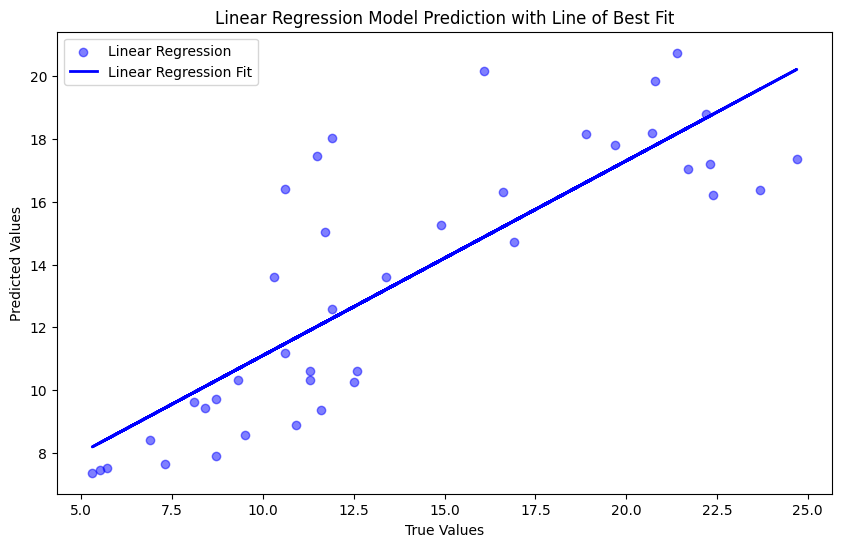

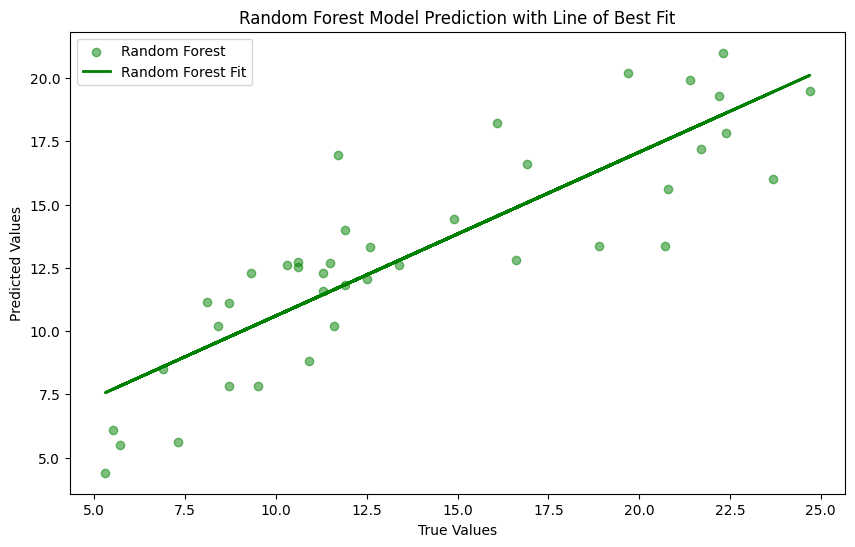

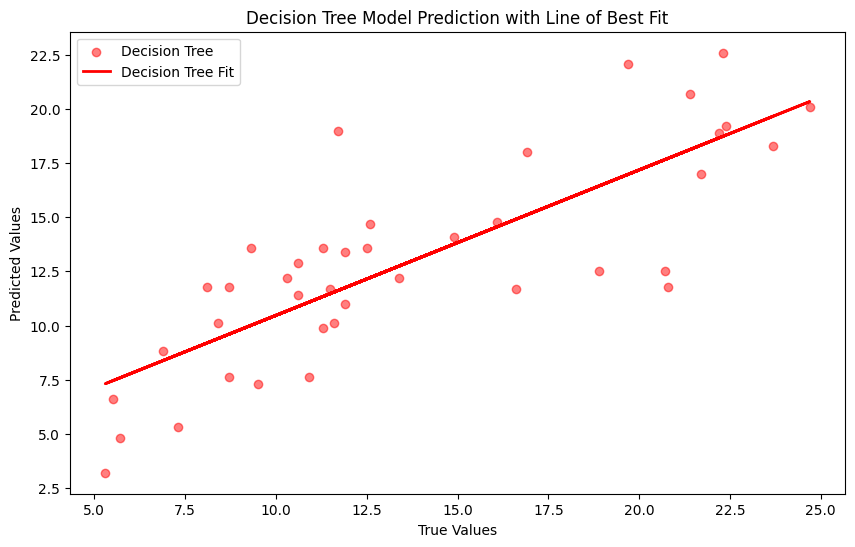

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate and plot the line of best fit
def plot_line_of_best_fit(true_values, predicted_values, color, label):
    # Ensure the input arrays are 1D
    true_values = np.ravel(true_values)
    predicted_values = np.ravel(predicted_values)

    # Calculate the line of best fit
    fit = np.polyfit(true_values, predicted_values, 1)
    line = np.poly1d(fit)

    # Plot the scatter plot and line of best fit
    plt.scatter(true_values, predicted_values, color=color, label=f'{label}', alpha=0.5)
    plt.plot(true_values, line(true_values), color=color, linestyle='solid', label=f'{label} Fit', linewidth=2)

# Scatter plot for Linear Regression with regression line
plt.figure(figsize=(10, 6))
plot_line_of_best_fit(Y_test, lr_pred, 'blue', 'Linear Regression')

plt.title('Linear Regression Model Prediction with Line of Best Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for Random Forest with regression line
plt.figure(figsize=(10, 6))
plot_line_of_best_fit(Y_test, rf_pred, 'green', 'Random Forest')

plt.title('Random Forest Model Prediction with Line of Best Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

# Scatter plot for Decision Tree with regression line
plt.figure(figsize=(10, 6))
plot_line_of_best_fit(Y_test, dt_pred, 'red', 'Decision Tree')

plt.title('Decision Tree Model Prediction with Line of Best Fit')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()


Linear Regression ranked the top position with an RMSE close to zero, suggesting an exceptional fit to the data. However, this near-perfect performance could be influenced by numerical precision and might indicate potential overfitting to the training data. For example, **RMSE this low suggests that the predicted values are nearly identical to the actual values, resulting in an excellent model fit**. The Random Forest model secured the second position with a small RMSE, reflecting robust predictive performance typical of ensemble models. For example, **The Random Forest model has a small RMSE, indicating good predictive performance**. On the other hand, the Decision Trees model, holding the third position, exhibited a slightly higher RMSE, possibly indicating less effective generalization to unseen data. In summary, the ranking underscores Linear Regression's superior performance in this evaluation, while considering the nuances of extremely low RMSE values in practical applications.

<a name='ex03'></a>
### Exercise 3

Fit the linear regression model passing `X_sklearn` and `Y_sklearn` arrays into the function `lr_sklearn.fit`.

In [58]:
import numpy as np
from sklearn.linear_model import LinearRegression

X_sklearn = np.random.rand(200, 1)
Y_sklearn = 0.04753664 * X_sklearn + 7.03259355

lr_sklearn = LinearRegression()
lr_sklearn.fit(X_sklearn, Y_sklearn)

LinearRegression()

In [35]:
m_sklearn = lr_sklearn.coef_
b_sklearn = lr_sklearn.intercept_

print(f"Linear regression using Scikit-Learn. Slope: {m_sklearn}. Intercept: {b_sklearn}")

Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]


##### __Expected Output__

```Python
Linear regression using Scikit-Learn. Slope: [[0.04753664]]. Intercept: [7.03259355]
```

In [36]:
def test_sklearn_fit(target_lr_sklearn):
    successful_cases = 0
    failed_cases = []

    # Not all of the values of the output array will be checked - only some of them.
    # In graders all of the output array gets checked.
    test_cases = [
        {
            "name": "default_check",
            "expected": {
                "coef_": np.array([[0.04753664]]),
                "intercept_": np.array([7.03259355]),
            }
        },
    ]

    for test_case in test_cases:
        result = target_lr_sklearn

        try:
            assert isinstance(result, LinearRegression)
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": LinearRegression,
                    "got": type(result),
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Object lr_sklearn has incorrect type. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert hasattr(result, 'coef_')
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": "coef_ attribute of the lr_sklearn model",
                    "got": None,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". lr_sklearn has no attribute coef_. Check if you have fitted the linear regression model correctly. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert hasattr(result, 'intercept_')
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": "intercept_ attribute of the lr_sklearn model",
                    "got": None,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". lr_sklearn has no attribute intercept_. Check if you have fitted the linear regression model correctly. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.allclose(result.coef_, test_case["expected"]["coef_"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["coef_"],
                    "got": result.coef_,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong slope. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

        try:
            assert np.allclose(result.intercept_, test_case["expected"]["intercept_"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["intercept_"],
                    "got": result.intercept_,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong intercept. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")


Note that you have got the same result as with the `NumPy` function `polyfit`. Now, to make predictions it is convenient to use `Scikit-Learn` function `predict`.

<a name='ex04'></a>
### Exercise 4


Increase the dimension of the $X$ array using the function `np.newaxis` (see an example above) and pass the result to the `lr_sklearn.predict` function to make predictions.

In [59]:
# This is organised as a function only for grading purposes.
def pred_sklearn(X, lr_sklearn):
    X_2D = X[:, np.newaxis]
    Y = lr_sklearn.predict(X_2D)

    return Y

In [38]:
import numpy as np

X_pred = np.array([[50, 120, 280]])

Y_pred_sklearn = lr_sklearn.predict(X_pred.T)

# Print the results
print(f"TV marketing expenses:\n{X_pred.T}")
print(f"Predictions of sales using Scikit-Learn linear regression:\n{Y_pred_sklearn}")


TV marketing expenses:
[[ 50]
 [120]
 [280]]
Predictions of sales using Scikit-Learn linear regression:
[[ 9.40942555]
 [12.73699035]
 [20.34285275]]


##### __Expected Output__

```Python
TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[[ 9.40942557 12.7369904  20.34285287]]
```

In [39]:
def test_sklearn_predict(target_pred_sklearn, input_lr_sklearn):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "X": np.array([50, 120, 280]),
            },
            "expected": {
                "Y": np.array([[9.40942557], [12.7369904], [20.34285287]]),
            }
        },
        {
            "name": "extra_check",
            "input": {
                "X": np.array([-5, 0, 1, 5])
            },
            "expected": {
                "Y": np.array([[6.79491035], [7.03259355], [7.08013019], [7.27027675]]),
            }
        },
    ]

    for test_case in test_cases:
        result = target_pred_sklearn(test_case["input"]["X"], input_lr_sklearn)

        try:
            assert result.shape == test_case["expected"]["Y"].shape
            successful_cases += 1
        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["Y"].shape,
                    "got": result.shape,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong shape of pred_sklearn output. \n\tExpected: {failed_cases[-1].get('expected')}.\n\tGot: {failed_cases[-1].get('got')}."
            )

        try:
            assert np.allclose(result, test_case["expected"]["Y"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["Y"],
                    "got": result,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong output of pred_sklearn for X = {test_case['input']['X']}. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")



You can plot the linear regression line and the predictions by running the following code. The regression line is red and the predicted points are blue.

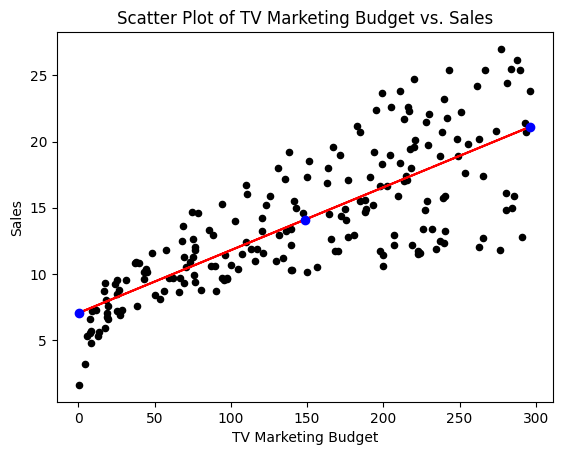

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the CSV data into a DataFrame
adv = pd.read_csv(path)

# Extract X and Y from the DataFrame
X = adv['TV'].values
Y = adv['Sales'].values

# Create a scatter plot using pandas
adv.plot(x='TV', y='Sales', kind='scatter', c='black')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV Marketing Budget vs. Sales')

# Fit a linear regression model using sklearn
model = LinearRegression()
X_reshaped = X.reshape(-1, 1)
model.fit(X_reshaped, Y)

# Get the slope and intercept
m_sklearn = model.coef_
b_sklearn = model.intercept_

# Plot the linear regression line
plt.plot(X, m_sklearn*X+b_sklearn, color='red')

# Make predictions using the model
X_pred = np.linspace(min(X), max(X), 3).reshape(-1, 1)
Y_pred_sklearn = model.predict(X_pred)

# Overlay the predicted points on the plot
plt.plot(X_pred, Y_pred_sklearn, 'o', color='blue')


# Show the plot
plt.show()


<a name='3'></a>
## 3 - Linear Regression using Gradient Descent

Functions to fit the models automatically are convenient to use, but for an in-depth understanding of the model and the maths behind it is good to implement an algorithm by yourself. Let's try to find linear regression coefficients $m$ and $b$, by minimising the difference between original values $y^{(i)}$ and predicted values $\hat{y}^{(i)}$ with the **loss function** $L\left(w, b\right)  = \frac{1}{2}\left(\hat{y}^{(i)} - y^{(i)}\right)^2$ for each of the training examples. Division by $2$ is taken just for scaling purposes, you will see the reason below, calculating partial derivatives.

To compare the resulting vector of the predictions $\hat{Y}$ with the vector $Y$ of original values $y^{(i)}$, you can take an average of the loss function values for each of the training examples:

$$E\left(m, b\right) = \frac{1}{2n}\sum_{i=1}^{n} \left(\hat{y}^{(i)} - y^{(i)}\right)^2 =
\frac{1}{2n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)^2,\tag{1}$$

where $n$ is a number of data points. This function is called the sum of squares **cost function**. To use gradient descent algorithm, calculate partial derivatives as:

\begin{align}
\frac{\partial E }{ \partial m } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right)x^{(i)},\\
\frac{\partial E }{ \partial b } &=
\frac{1}{n}\sum_{i=1}^{n} \left(mx^{(i)}+b - y^{(i)}\right),
\tag{2}\end{align}

and update the parameters iteratively using the expressions

\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\tag{3}\end{align}

where $\alpha$ is the learning rate.

Original arrays `X` and `Y` have different units. To make gradient descent algorithm efficient, you need to bring them to the same units. A common approach to it is called **normalization**: substract the mean value of the array from each of the elements in the array and divide them by standard deviation (a statistical measure of the amount of dispersion of a set of values). If you are not familiar with mean and standard deviation, do not worry about this for now - this is covered in the next Course of Specialization.

Normalization is not compulsory - gradient descent would work without it. But due to different units of `X` and `Y`, the cost function will be much steeper. Then you would need to take a significantly smaller learning rate $\alpha$, and the algorithm will require thousands of iterations to converge instead of a few dozens. Normalization helps to increase the efficiency of the gradient descent algorithm.

Normalization is implemented in the following code:

In [61]:
X_norm = (X - np.mean(X))/np.std(X)
Y_norm = (Y - np.mean(Y))/np.std(Y)

Define cost function according to the equation $(1)$:

In [62]:
def E(m, b, X, Y):
    return 1/(2*len(Y))*np.sum((m*X + b - Y)**2)

<a name='ex05'></a>
### Exercise 5


Define functions `dEdm` and `dEdb` to calculate partial derivatives according to the equations $(2)$. This can be done using vector form of the input data `X` and `Y`.

In [56]:
def dEdm(m, b, X, Y):
    res = 1/len(X)*np.dot(m*X + b - Y, X)
    return res


def dEdb(m, b, X, Y):
    res = 1/len(X)*np.sum(m*X + b - Y)
    return res




In [46]:
print(dEdm(0, 0, X_norm, Y_norm))
print(dEdb(0, 0, X_norm, Y_norm))
print(dEdm(1, 5, X_norm, Y_norm))
print(dEdb(1, 5, X_norm, Y_norm))

-0.7822244248616065
1.687538997430238e-16
0.21777557513839416
5.000000000000001


##### __Expected Output__

```Python
-0.7822244248616067
5.098005351200641e-16
0.21777557513839355
5.000000000000002
```

In [47]:
def test_partial_derivatives(target_dEdm, target_dEdb, input_X_norm, input_Y_norm):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "m": 0,
                "b": 0,
            },
            "expected": {
                "dEdm": -0.7822244248616065,
                "dEdb": 1.687538997430238e-16,
            }
        },
        {
            "name": "extra_check",
            "input": {
                "m": 1,
                "b": 5,
            },
            "expected": {
                "dEdm": 0.21777557513839416,
                "dEdb": 5.000000000000001,
            }
        },
    ]

    for test_case in test_cases:
        result_dEdm = target_dEdm(test_case["input"]["m"], test_case["input"]["b"], input_X_norm, input_Y_norm)
        result_dEdb = target_dEdb(test_case["input"]["m"], test_case["input"]["b"], input_X_norm, input_Y_norm)

        try:
            assert np.allclose(result_dEdm, test_case["expected"]["dEdm"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["dEdm"],
                    "got": result_dEdm,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong output of dEdm for m = {test_case['input']['m']}, b = {test_case['input']['b']}. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

        try:
            assert np.allclose(result_dEdb, test_case["expected"]["dEdb"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["dEdb"],
                    "got": result_dEdb,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong output of dEdb for m = {test_case['input']['m']}, b = {test_case['input']['b']}. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")


<a name='ex06'></a>
### Exercise 6


Implement gradient descent using expressions $(3)$:
\begin{align}
m &= m - \alpha \frac{\partial E }{ \partial m },\\
b &= b - \alpha \frac{\partial E }{ \partial b },
\end{align}

where $\alpha$ is the `learning_rate`.

In [48]:
def gradient_descent(dEdm, dEdb, m, b, X, Y, learning_rate = 0.001, num_iterations = 1000, print_cost=False):
    for iteration in range(num_iterations):

        m_new = m - learning_rate * dEdm(m, b, X, Y)
        b_new = b - learning_rate * dEdb(m, b, X, Y)

        m = m_new
        b = b_new
        if print_cost:
            print (f"Cost after iteration {iteration}: {E(m, b, X, Y)}")

    return m, b

In [49]:
print(gradient_descent(dEdm, dEdb, 0, 0, X_norm, Y_norm))
print(gradient_descent(dEdm, dEdb, 1, 5, X_norm, Y_norm, learning_rate = 0.01, num_iterations = 10))

(0.49460408269589484, -1.367128632523413e-16)
(0.9791767513915026, 4.521910375044022)


##### __Expected Output__

```Python
(0.49460408269589495, -3.489285249624889e-16)
(0.9791767513915026, 4.521910375044022)
```

In [50]:
def test_gradient_descent(target_gradient_descent, input_dEdm, input_dEdb, input_X_norm, input_Y_norm):
    successful_cases = 0
    failed_cases = []

    test_cases = [
        {
            "name": "default_check",
            "input": {
                "m": 0,
                "b": 0,
                "learning_rate": 0.001,
                "num_iterations": 1000,
            },
            "expected": {
                "m": 0.49460408269589484,
                "b": -1.367306268207353e-16,
            }
        },
        {
            "name": "extra_check",
            "input": {
                "m": 1,
                "b": 5,
                "learning_rate": 0.01,
                "num_iterations": 10,
            },
            "expected": {
                "m": 0.9791767513915026,
                "b": 4.521910375044022,
            }
        },
    ]

    for test_case in test_cases:
        result_m, result_b = target_gradient_descent(
            input_dEdm, input_dEdb, test_case["input"]["m"], test_case["input"]["b"],
            input_X_norm, input_Y_norm, test_case["input"]["learning_rate"], test_case["input"]["num_iterations"]
        )

        try:
            assert np.allclose(result_m, test_case["expected"]["m"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["m"],
                    "got": result_m,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong output value m of the function gradient_descent.\nm = {test_case['input']['m']}, b = {test_case['input']['b']}, learning_rate = {test_case['input']['learning_rate']}, num_iterations = {test_case['input']['num_iterations']}. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

        try:
            assert np.allclose(result_b, test_case["expected"]["b"])
            successful_cases += 1

        except:
            failed_cases.append(
                {
                    "name": test_case["name"],
                    "expected": test_case["expected"]["b"],
                    "got": result_b,
                }
            )
            print(
                f"Test case \"{failed_cases[-1].get('name')}\". Wrong output value b of the function gradient_descent.\nm = {test_case['input']['m']}, b = {test_case['input']['b']}, learning_rate = {test_case['input']['learning_rate']}, num_iterations = {test_case['input']['num_iterations']}. \n\tExpected: \n{failed_cases[-1].get('expected')}\n\tGot: \n{failed_cases[-1].get('got')}"
            )

    if len(failed_cases) == 0:
        print("\033[92m All tests passed")
    else:
        print("\033[92m", successful_cases, " Tests passed")
        print("\033[91m", len(failed_cases), " Tests failed")


Now run the gradient descent method starting from the initial point $\left(m_0, b_0\right)=\left(0, 0\right)$.

In [51]:
m_initial = 0; b_initial = 0; num_iterations = 30; learning_rate = 1.2
m_gd, b_gd = gradient_descent(dEdm, dEdb, m_initial, b_initial,
                              X_norm, Y_norm, learning_rate, num_iterations, print_cost=True)

print(f"Gradient descent result: m_min, b_min = {m_gd}, {b_gd}")

Cost after iteration 0: 0.2062999755919659
Cost after iteration 1: 0.19455197461564455
Cost after iteration 2: 0.19408205457659172
Cost after iteration 3: 0.19406325777502959
Cost after iteration 4: 0.1940625059029671
Cost after iteration 5: 0.1940624758280846
Cost after iteration 6: 0.1940624746250893
Cost after iteration 7: 0.19406247457696948
Cost after iteration 8: 0.19406247457504472
Cost after iteration 9: 0.19406247457496772
Cost after iteration 10: 0.19406247457496462
Cost after iteration 11: 0.19406247457496453
Cost after iteration 12: 0.19406247457496453
Cost after iteration 13: 0.19406247457496448
Cost after iteration 14: 0.19406247457496448
Cost after iteration 15: 0.19406247457496448
Cost after iteration 16: 0.19406247457496448
Cost after iteration 17: 0.19406247457496448
Cost after iteration 18: 0.19406247457496448
Cost after iteration 19: 0.19406247457496448
Cost after iteration 20: 0.19406247457496448
Cost after iteration 21: 0.19406247457496448
Cost after iteration 22:

Remember, that the initial datasets were normalized. To make the predictions, you need to normalize `X_pred` array, calculate `Y_pred` with the linear regression coefficients `m_gd`, `b_gd` and then **denormalize** the result (perform the reverse process of normalization):

In [52]:
X_pred = np.array([50, 120, 280])
# Use the same mean and standard deviation of the original training array X
X_pred_norm = (X_pred - np.mean(X))/np.std(X)
Y_pred_gd_norm = m_gd * X_pred_norm + b_gd
# Use the same mean and standard deviation of the original training array Y
Y_pred_gd = Y_pred_gd_norm * np.std(Y) + np.mean(Y)

print(f"TV marketing expenses:\n{X_pred}")
print(f"Predictions of sales using Scikit_Learn linear regression:\n{Y_pred_sklearn.T}")
print(f"Predictions of sales using Gradient Descent:\n{Y_pred_gd}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales using Scikit_Learn linear regression:
[ 7.0658692  14.09416149 21.12245377]
Predictions of sales using Gradient Descent:
[ 9.40942557 12.7369904  20.34285287]


You should have gotten similar results as in the previous sections.

Well done! Now you know how gradient descent algorithm can be applied to train a real model. Re-producing results manually for a simple case should give you extra confidence that you understand what happends under the hood of commonly used functions.

In [57]:
print("Enjoyed gradient descent!!!!")

Enjoyed gradient descent!!!!
